- Compare RMSE results with other regression models

### How to Implement Linear Regression With Stochastic Gradient Descent From Scratch With Python
https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/

In [1]:
# Linear Regression With Stochastic Gradient Descent for Wine Quality
from random import seed
from random import randrange
from csv import reader
from math import sqrt


def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            #if not row:
                #continue
            dataset.append(row)
    return dataset

dataset = load_csv('winequality-white.csv')
#dataset[0:10]
seed(1)

Each row contains a string instead of a list of values. Use split to separate the values from the string and convert the values from string to float.

In [2]:
new = []
for i, row in enumerate(dataset):
    if i == 0:
        continue
    temp = row[0].split(';')
    new.append(temp)

def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())
        
for i in range(len(new[0])):
    str_column_to_float(new, i)

dataset = new.copy()


In [3]:
# Find the min and max values for each column
def dataset_minmax(dataset):
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

minmax_data = dataset_minmax(dataset)
minmax_data


[[3.8, 14.2],
 [0.08, 1.1],
 [0.0, 1.66],
 [0.6, 65.8],
 [0.009, 0.346],
 [2.0, 289.0],
 [9.0, 440.0],
 [0.98711, 1.03898],
 [2.72, 3.82],
 [0.22, 1.08],
 [8.0, 14.2],
 [3.0, 9.0]]

The range for each feature differs, so min-max normalization is used. All the values will fall into range (0,1)

In [4]:
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
            
normalize_dataset(dataset, minmax_data)


Linear Regression prediction: $\hat{y}=\sideset{}{_{i=0}^{n}}\sum b_{i}x_{i}$.

Cost Function = $f=\frac{1}{2}\sum(y-\hat{y})^{2}$. 

Gradient Descent: $b_i = b_i - learning\_rate * \nabla f$ where $\nabla f = (y-\hat{y})*x_i = error * x_i$

In [5]:
# Make a prediction with coefficients
def predict(row, coeff):
    yhat = coeff[0]
    for i in range(len(row)-1):
        yhat += coeff[i + 1] * row[i]
    return yhat

# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(train, learning_rate, epoch):
    coeff = [0.0 for i in range(len(train[0]))]
    for epoch in range(epoch):
        for row in train:
            yhat = predict(row, coeff)
            error = yhat - row[-1]
            coeff[0] = coeff[0] - learning_rate * error
            for i in range(len(row)-1):
                coeff[i + 1] = coeff[i + 1] - learning_rate * error * row[i]
            # print(l_rate, n_epoch, error)
    return coeff

In [6]:
# Linear Regression Algorithm With Stochastic Gradient Descent
def linear_regression_sgd(train, test, learning_rate, epoch):
    predictions = list()
    coeff = coefficients_sgd(train, learning_rate, epoch)
    for row in test:
        yhat = predict(row, coeff)
        predictions.append(yhat)
    return predictions

In [7]:
residual = list()
predicted_list = list()
actual_list = list()
import matplotlib.pyplot as plt
# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        residual.append(prediction_error)
        predicted_list.append(predicted[i])
        actual_list.append(actual[i])
        sum_error += (prediction_error ** 2)
    fig = plt.scatter(predicted_list, residual)
    plt.title('Residuals VS Predicted Values')
    print(fig)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

fold size = number of training data in each set.
k-1 folds are used as training data.
cross validation is used to measure prediction accuracy.

In [8]:
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

# Evaluate an algorithm using a cross validation split
def evaluate_algthm(dataset, algthm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algthm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        rmse = rmse_metric(actual, predicted)
        scores.append(rmse)
    return scores

Scores: [0.12248058224159092, 0.13034017509167112, 0.12620370547483578, 0.12897687952843237, 0.12446990678682233]
Mean RMSE: 0.126


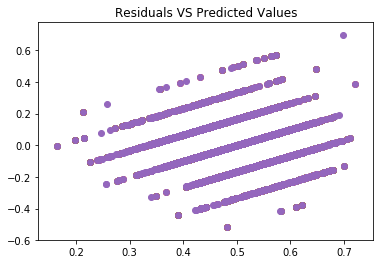

In [9]:
# evaluate algorithm
n_folds = 5
l_rate = 0.01
epoch = 50
scores = evaluate_algthm(dataset, linear_regression_sgd, n_folds, l_rate, epoch)
print('Scores: %s' % scores)
print('Mean RMSE: %.3f' % (sum(scores)/float(len(scores))))

In [10]:
def train_test_split(dataset, split_ratio):
    training_set = list()
    dataset_copy = list(dataset)
    train_size = split_ratio * len(dataset)
    while len(training_set) < train_size:
        index = randrange(len(dataset_copy))
        training_set.append(dataset_copy.pop(index))    
    #plt.figure(1)
    #x = [row[0] for row in training_set]
    #y = [row[-1] for row in training_set]
    #print(plt.figure(1))
    return training_set, dataset_copy

import pandas as pd

split = 0.6
training_set, testing_set = train_test_split(dataset, split)
training_set = pd.DataFrame(training_set)
testing_set = pd.DataFrame(testing_set)
x_train = training_set.iloc[:,0:-1]
y_train = training_set.iloc[:,-1]
x_test = testing_set.iloc[:,0:-1]
y_test = testing_set.iloc[:,-1]



Check the correlations between the features, which may affect the accuracy. Feature 3 and feature 7 seem highly correlated.

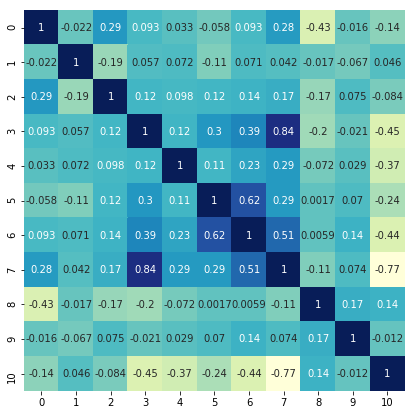

In [11]:
import seaborn as sns

corr_mat=x_train.corr(method='pearson')
plt.figure(figsize=(7,7))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cbar = False, cmap='YlGnBu')

Compare RMSE with different regression models, namely Ridge regression, kNN, Bayesian and SVM.

https://www.kaggle.com/ankitjha/comparing-regression-models

In [12]:
from sklearn import linear_model

ridge_model=linear_model.Ridge()
ridge_model.fit(x_train,y_train)

yhat_ridge=ridge_model.predict(x_test)
y_predict_ridge=list(yhat_ridge)

error=0.0
for i in range(len(y_test)):
    error+=((y_predict_ridge[i]-y_test[i]) ** 2)

test_error_ridge=sqrt(error/float(len(y_test)))
print('RMSE in ridge regression: %.3f' % test_error_ridge)


RMSE in ridge regression: 0.128


In [13]:
from sklearn import neighbors

n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(x_train,y_train)

yhat_knn=knn.predict(x_test)
y_predict_knn=list(yhat_knn)

error=0.0

for i in range(len(y_test)):
    error+=((y_predict_knn[i]-y_test[i]) ** 2)

test_error_knn=sqrt(error/float(len(y_test)))
print('RMSE in knn algorithm: %.3f' % test_error_knn)

RMSE in knn algorithm: 0.123


In [14]:
import numpy as np
bayes_model = linear_model.BayesianRidge()
bayes_model.fit(x_train,y_train)

yhat_bayes = bayes_model.predict(x_test)
y_predict_bayes=list(yhat_bayes)

error=0.0

for i in range(len(y_test)):
    error+=((y_predict_bayes[i]-y_test[i]) ** 2)

test_error_bayes=sqrt(error/float(len(y_test)))
print('RMSE in Bayesian Regression: %.3f' % test_error_bayes)


RMSE in Bayesian Regression: 0.127


RMSE in SVM: 0.126


Text(0.5,1,'Residuals VS Predicted Values')

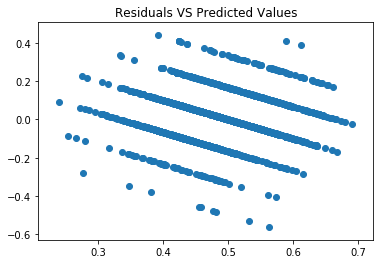

In [15]:
from sklearn import svm

svm_model=svm.SVR()
svm_model.fit(x_train,y_train)

yhat_svm=svm_model.predict(x_test)
y_predict_svm=list(yhat_svm)

error=0.0
residuals_list = list()
for i in range(len(y_test)):
    residuals = y_test[i] - y_predict_svm[i]
    residuals_list.append(residuals)
    error+=((residuals) ** 2)

test_error_svm=sqrt(error/float(len(y_test)))
print('RMSE in SVM: %.3f' % test_error_svm)

plt.scatter(y_predict_svm, residuals_list)
plt.title('Residuals VS Predicted Values')


In [16]:
reg_models = list(['Ridge', 'kNN', 'Bayesian', 'SVM'])
error_values = list([test_error_ridge, test_error_knn, test_error_bayes, test_error_svm])
error_results = pd.DataFrame(list(zip(reg_models, error_values)), columns = ('Models', 'RMSE'))
error_results

,Models,RMSE
0,Ridge,0.127597
1,kNN,0.123412
2,Bayesian,0.127258
3,SVM,0.126409
